In [130]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [131]:
data = pd.read_csv('haberman.csv', names=['Age', 'Year', 'Axillary_Nodes', 'Class'], header=None)

In [132]:
data.head()

,Age,Year,Axillary_Nodes,Class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
# COnverting the featuers to binary

x = data.as_matrix(['Age', 'NumOfAxillaryNodes'])
y = data['Class'].values.tolist()

D:\Data\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                         test_size=0.33, random_state=40,stratify=y)

### Decision Tree Classificaiton 

In [168]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)

In [169]:
y_pred = dtc.predict(x_test)

In [170]:
y_pred_prob = dtc.predict_proba(x_test)

In [171]:
# print(y_pred_prob)

In [172]:
y_pred_prob = y_pred_prob[:,0]

In [173]:
# print(y_pred_prob)

### Accuracy of the model

In [184]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6831683168316832

#### Count Negative 

In [185]:
y_test.count(1)

74

#### Count positive

In [186]:
y_test.count(2)

27

#### Precision Recall values  AND classification report

In [187]:
# https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/
# I used the above to calculate precision and recall 

knn =  GaussianNB()

In [188]:
knn.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [189]:
predictions = knn.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7326732673267327
[[74  0]
 [27  0]]
              precision    recall  f1-score   support

           1       0.73      1.00      0.85        74
           2       0.00      0.00      0.00        27

    accuracy                           0.73       101
   macro avg       0.37      0.50      0.42       101
weighted avg       0.54      0.73      0.62       101



D:\Data\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Confusion matrix

In [190]:
confusion_matrix(y_test, y_pred, labels=[1, 2])

array([[65,  9],
       [23,  4]], dtype=int64)

### ROC CURVE

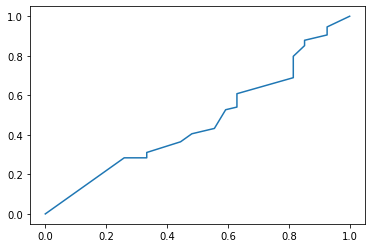

In [191]:
### https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob, pos_label=1)

plt.plot(fpr, tpr)
plt.show()

### PERCISION RECALL CURVE 

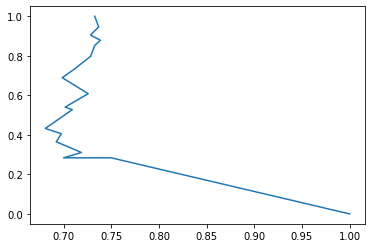

In [192]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob, pos_label=1)

plt.plot(precision, recall)
plt.show()